<a href="https://colab.research.google.com/github/motomura-s/korean-onomatopoeia-list/blob/main/text_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.korean.go.kr/synap/skin/doc.html?fn=54ec16d4-39eb-45f4-88bc-cc6e600e064a_0.hwp&rs=/attachFile/viewer/202412

In [33]:
import re
import json

In [4]:
raw_text = open("raw_text.txt", "r").read()

In [5]:
pattern = re.compile('[가-힣]+')
matches = pattern.findall(raw_text)
len(matches), len(set(matches)), matches[:10]

(29059,
 26687,
 ['가굴가굴',
  '가굴가굴하다',
  '가꾸러뜨리다',
  '가꾸러지다',
  '가꾸러트리다',
  '가꾸로',
  '가년스럽다',
  '가년스레',
  '가누다',
  '가닐'])

In [6]:
with open("words.txt", "w") as f:
    f.write("\n".join(sorted(set(matches))))

In [28]:
words = open("words.txt").read().splitlines()
len(words)

26687

In [59]:
!pip install hgtk japanize-matplotlib koreanize-matplotlib --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.7 MB/s eta 0:00:00


In [60]:
import hgtk
import itertools
import japanize_matplotlib
import koreanize_matplotlib
import matplotlib.pyplot as plt

In [10]:
for i in range(1, 5):
    print(i)
    for template in itertools.product(["CV", "CVC"], repeat=i):
        print('"'+f"{''.join(template)}"+ '"' + ": [],")

1
"CV": [],
"CVC": [],
2
"CVCV": [],
"CVCVC": [],
"CVCCV": [],
"CVCCVC": [],
3
"CVCVCV": [],
"CVCVCVC": [],
"CVCVCCV": [],
"CVCVCCVC": [],
"CVCCVCV": [],
"CVCCVCVC": [],
"CVCCVCCV": [],
"CVCCVCCVC": [],
4
"CVCVCVCV": [],
"CVCVCVCVC": [],
"CVCVCVCCV": [],
"CVCVCVCCVC": [],
"CVCVCCVCV": [],
"CVCVCCVCVC": [],
"CVCVCCVCCV": [],
"CVCVCCVCCVC": [],
"CVCCVCVCV": [],
"CVCCVCVCVC": [],
"CVCCVCVCCV": [],
"CVCCVCVCCVC": [],
"CVCCVCCVCV": [],
"CVCCVCCVCVC": [],
"CVCCVCCVCCV": [],
"CVCCVCCVCCVC": [],


In [29]:
words_by_template = {
    # 1文字
    "CV": [], # 새
    "CVC": [], # 뺨
    # 2文字
    "CV-CV": [], # 뛰뛰
    "CV-CVC": [], # 매옴
    "CVC-CV": [], # 멍추
    "CVC-CVC": [], # 멀뚱
    # 3文字
    "CV-CV-CV": [], # 두르르
    "CVC-CV-CV": [], # 갈기다
    "CV-CVC-CV": [], # 나긋이
    "CV-CV-CVC": [], # 푸드덕
    "CVC-CVC-CV": [], # 뻔뻔히
    "CVC-CV-CVC": [], # 콩다콩
    "CV-CVC-CVC": [], # 차근덕
    "CVC-CVC-CVC": [], # 쿵닥딱
    # 4文字
    "CV-CV-CV-CV": [], # 꼬지꼬지
    "CV-CV-CV-CVC": [], # 가마아득
    "CV-CV-CVC-CV": [], # 미치광이
    "CV-CV-CVC-CVC": [], # 두리둥둥
    "CV-CVC-CV-CV": [], # 푸석대다
    "CV-CVC-CV-CVC": [], # 후들후들
    "CV-CVC-CVC-CV": [], # 게름뱅이
    "CV-CVC-CVC-CVC": [], # 화닥뚝닥
    "CVC-CV-CV-CV": [], # 살그머니
    "CVC-CV-CV-CVC": [], # 뱐미주룩
    "CVC-CV-CVC-CV": [], # 옹기옹기
    "CVC-CV-CVC-CVC": [], # 할래발딱
    "CVC-CVC-CV-CV": [], # 몽톡하다
    "CVC-CVC-CV-CVC": [], # 납죽스름
    "CVC-CVC-CVC-CV": [], # 알금뱅이
    "CVC-CVC-CVC-CVC": [], # 훌떡훌떡
}
for word in words:
    jamos = hgtk.text.decompose(word, compose_code="/").strip("/").split("/")
    if len(jamos) == 1:
        if len(jamos[0]) == 2:
            words_by_template["CV"].append(word)
        elif len(jamos[0]) == 3:
            words_by_template["CVC"].append(word)
    elif len(jamos) == 2:
        if len(jamos[0]) == 2 and len(jamos[1]) == 2:
            words_by_template["CV-CV"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 3:
            words_by_template["CV-CVC"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 2:
            words_by_template["CVC-CV"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 3:
            words_by_template["CVC-CVC"].append(word)
    elif len(jamos) == 3:
        if len(jamos[0]) == 2 and len(jamos[1]) == 2 and len(jamos[2]) == 2:
            words_by_template["CV-CV-CV"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 2 and len(jamos[2]) == 2:
            words_by_template["CVC-CV-CV"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 3 and len(jamos[2]) == 2:
            words_by_template["CV-CVC-CV"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 2 and len(jamos[2]) == 3:
            words_by_template["CV-CV-CVC"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 3 and len(jamos[2]) == 2:
            words_by_template["CVC-CVC-CV"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 2 and len(jamos[2]) == 3:
            words_by_template["CVC-CV-CVC"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 3 and len(jamos[2]) == 3:
            words_by_template["CV-CVC-CVC"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 3 and len(jamos[2]) == 3:
            words_by_template["CVC-CVC-CVC"].append(word)
    elif len(jamos) == 4:
        if len(jamos[0]) == 2 and len(jamos[1]) == 2 and len(jamos[2]) == 2 and len(jamos[3]) == 2:
            words_by_template["CV-CV-CV-CV"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 2 and len(jamos[2]) == 2 and len(jamos[3]) == 3:
            words_by_template["CV-CV-CV-CVC"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 2 and len(jamos[2]) == 3 and len(jamos[3]) == 2:
            words_by_template["CV-CV-CVC-CV"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 2 and len(jamos[2]) == 3 and len(jamos[3]) == 3:
            words_by_template["CV-CV-CVC-CVC"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 3 and len(jamos[2]) == 2 and len(jamos[3]) == 2:
            words_by_template["CV-CVC-CV-CV"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 3 and len(jamos[2]) == 2 and len(jamos[3]) == 3:
            words_by_template["CV-CVC-CV-CVC"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 3 and len(jamos[2]) == 3 and len(jamos[3]) == 2:
            words_by_template["CV-CVC-CVC-CV"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 3 and len(jamos[2]) == 2 and len(jamos[3]) == 3:
            words_by_template["CV-CVC-CV-CVC"].append(word)
        elif len(jamos[0]) == 2 and len(jamos[1]) == 3 and len(jamos[2]) == 3 and len(jamos[3]) == 3:
            words_by_template["CV-CVC-CVC-CVC"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 2 and len(jamos[2]) == 2 and len(jamos[3]) == 2:
            words_by_template["CVC-CV-CV-CV"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 2 and len(jamos[2]) == 2 and len(jamos[3]) == 3:
            words_by_template["CVC-CV-CV-CVC"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 2 and len(jamos[2]) == 3 and len(jamos[3]) == 2:
            words_by_template["CVC-CV-CVC-CV"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 2 and len(jamos[2]) == 3 and len(jamos[3]) == 3:
            words_by_template["CVC-CV-CVC-CVC"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 3 and len(jamos[2]) == 2 and len(jamos[3]) == 2:
            words_by_template["CVC-CVC-CV-CV"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 3 and len(jamos[2]) == 2 and len(jamos[3]) == 3:
            words_by_template["CVC-CVC-CV-CVC"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 3 and len(jamos[2]) == 3 and len(jamos[3]) == 2:
            words_by_template["CVC-CVC-CVC-CV"].append(word)
        elif len(jamos[0]) == 3 and len(jamos[1]) == 3 and len(jamos[2]) == 3 and len(jamos[3]) == 3:
            words_by_template["CVC-CVC-CVC-CVC"].append(word)

In [31]:
pruned_words_by_template = {}
for template, words in words_by_template.items():
    pruned = []
    for word in words:
        if word.endswith("다"):
            continue
        if word.endswith("히"):
            # 確認できた例外
            # 히 히히 이히히
            continue
        elif word.endswith("이"):
            # 아이 어이 이이
            continue
        pruned.append(word)
    pruned_words_by_template[template] = pruned

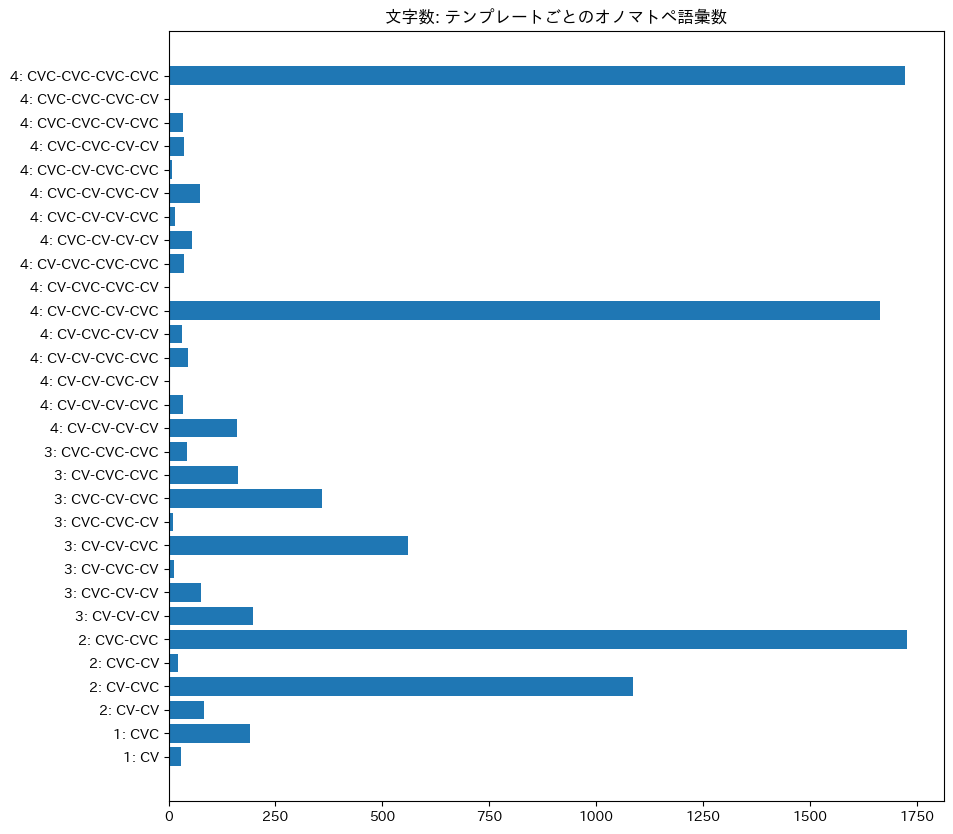

In [32]:
cnt_dic = {k: len(v) for k, v in pruned_words_by_template.items()}

plt.figure(figsize=(10, 10))
plt.barh(range(len(pruned_words_by_template)), cnt_dic.values(), tick_label=[f"{k.count('V')}: {k}"for k in cnt_dic.keys()]) # Vの数は文字数
plt.title("文字数: テンプレートごとのオノマトペ語彙数")
plt.show()

In [34]:
with open("pruned_words_by_template.json", "w") as f:
    json.dump(pruned_words_by_template, f)

In [48]:
set1 = set([f"{word}{word}" for word in pruned_words_by_template["CV-CV"]])
set2 = set(pruned_words_by_template["CV-CV-CV-CV"])
set1_2 = set1 & set2
len(set1_2) / len(set1), len(set1_2) / len(set2), set1_2

(0.0975609756097561,
 0.050314465408805034,
 {'비오비오', '재자재자', '조러조러', '주저주저', '지저지저', '지지지지', '차차차차', '휘유휘유'})

In [50]:
set1 = set([f"{word}{word}" for word in pruned_words_by_template["CV-CVC"]])
set2 = set(pruned_words_by_template["CV-CVC-CV-CVC"])
set1_2 = set1 & set2
len(set1_2) / len(set1), len(set1_2) / len(set2)

(0.891444342226311, 0.581981981981982)

In [49]:
set1 = set([f"{word}{word}" for word in pruned_words_by_template["CVC-CV"]])
set2 = set(pruned_words_by_template["CVC-CV-CVC-CV"])
set1_2 = set1 & set2
len(set1_2) / len(set1), len(set1_2) / len(set2), set1_2

(0.2857142857142857,
 0.08108108108108109,
 {'붐빠붐빠', '뿜빠뿜빠', '살래살래', '설레설레', '쌀래쌀래', '썰레썰레'})

In [47]:
set1 = set([f"{word}{word}" for word in pruned_words_by_template["CVC-CVC"]])
set2 = set(pruned_words_by_template["CVC-CVC-CVC-CVC"])
set1_2 = set1 & set2
len(set1_2) / len(set1), len(set1_2) / len(set2)

(0.7261146496815286, 0.7278003482298316)

In [52]:
# CV-CVC-CV-CVC / CVC-CVC-CVC-CVCのうち、完全な畳語形になっているもの
reduplications = []
set1 = set([f"{word}{word}" for word in pruned_words_by_template["CV-CVC"]])
set2 = set(pruned_words_by_template["CV-CVC-CV-CVC"])
reduplications += list(set1 & set2)

set1 = set([f"{word}{word}" for word in pruned_words_by_template["CVC-CVC"]])
set2 = set(pruned_words_by_template["CVC-CVC-CVC-CVC"])
reduplications += list(set1 & set2)

len(reduplications), reduplications[:5]

(2223, ['시룽시룽', '꾸물꾸물', '조촘조촘', '또각또각', '떼룩떼룩'])

In [63]:
cnt_dic.keys()

dict_keys(['ㅅ', 'ㄲ', 'ㅈ', 'ㄸ', 'ㅂ', 'ㄴ', 'ㅎ', 'ㅌ', 'ㄱ', 'ㅍ', 'ㅉ', 'ㅁ', 'ㄷ', 'ㅇ', 'ㅃ', 'ㅊ', 'ㅋ', 'ㅆ'])

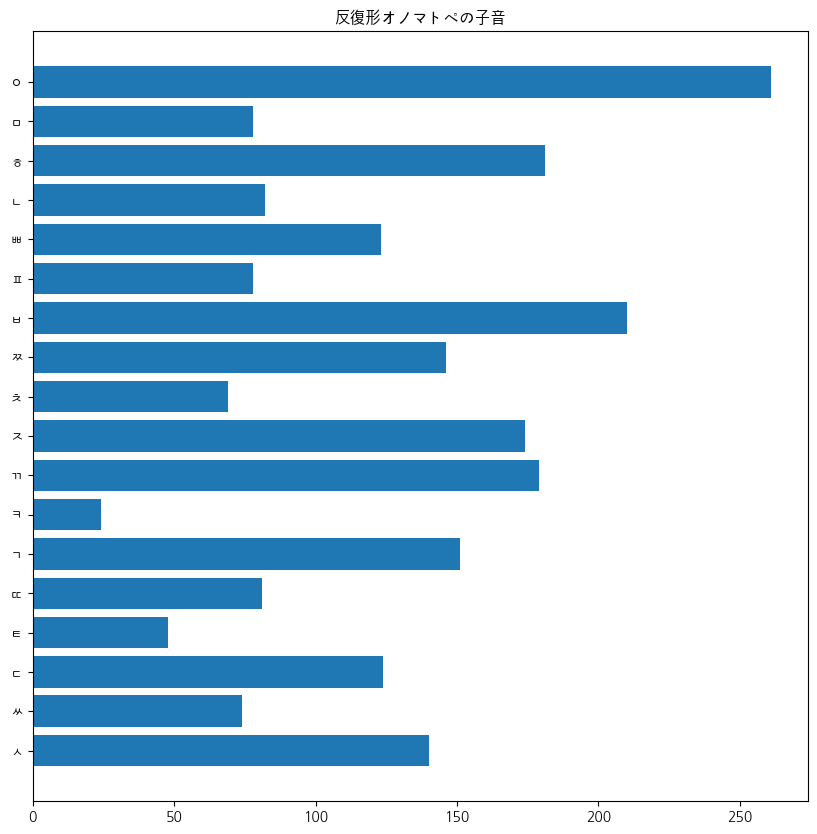

In [64]:
words_by_first_consonant = {}
for word in reduplications:
    consonant = hgtk.text.decompose(word, compose_code="/").split("/")[0][0]
    words_by_first_consonant.setdefault(consonant, [])
    words_by_first_consonant[consonant].append(word)

cnt_dic = {k: len(words_by_first_consonant[k]) for k in ['ㅅ', 'ㅆ', 'ㄷ', 'ㅌ', 'ㄸ', 'ㄱ', 'ㅋ', 'ㄲ', 'ㅈ', 'ㅊ', 'ㅉ', 'ㅂ', 'ㅍ', 'ㅃ', 'ㄴ', 'ㅎ', 'ㅁ', 'ㅇ']}

plt.figure(figsize=(10, 10))
plt.barh(range(len(cnt_dic)), cnt_dic.values(), tick_label=list(cnt_dic.keys()))
plt.title("反復形オノマトペの子音")
plt.show()